In [64]:
import rebound
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [48]:
sim = rebound.Simulation()
choice_date="2000-01-01 00:00"

sim.add(["Sun", "Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"],date=choice_date)
sim.save("tot_ss.bin")

sim.status()

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for 'Earth'... Found: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Mars Barycenter (4).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).
---------------------------------
REBOUND version:     	3.12.1
REBOUND built on:    	Feb 13 2020 23:13:03
Number of particles: 	9
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.007139143380212697 y=-0.002792019770161695 z=0.0002061838852554664 vx=0.00

In [50]:
sim_final = rebound.Simulation()
final_date="3000-01-01 00:00"

 

sim_final.add(["Sun", "Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"],date=final_date)
sim_final.save("fin_tot_ss.bin")
sim_final.status()

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for 'Earth'... Found: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Mars Barycenter (4).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).
---------------------------------
REBOUND version:     	3.12.1
REBOUND built on:    	Feb 13 2020 23:13:03
Number of particles: 	9
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=0.0003696952301199865 y=-0.002289992963189995 z=5.450535971831709e-05 vx=0.00

In [61]:
sim = rebound.Simulation("tot_ss.bin")
sim_final = rebound.Simulation("fin_tot_ss.bin")

sim.t = 0
sim.move_to_com()
Noutputs = 1000
energy_i = sim.calculate_energy()
e_changes = np.zeros(Noutputs)
time_values = np.zeros(Noutputs)
yrs = 1000
num_times = np.linspace(0,yrs,Noutputs)
i = 0

for time in num_times:
    sim.integrate(time)
    energy_f = sim.calculate_energy()
    e_changes[i] = energy_f - energy_i
    time_values[i] = time
    i+=1



In [62]:
for i in range(8):
    x_err = abs(sim.particles[i+1].x - sim_final.particles[i+1].x)/sim.particles[i+1].x
    y_err = abs(sim.particles[i+1].y - sim_final.particles[i+1].y)/sim.particles[i+1].x
    print(i,x_err,y_err)

0 -0.3450663251948759 -0.5279341779940854
1 2.997476965989451 4.850100242452431
2 -1.0729113634503664 -0.6565913479873947
3 -0.18827385832345309 -0.23015408084034308
4 -0.16844052444934252 -0.6293058938519029
5 -1.9383522312238812 -0.8487240299418667
6 0.3554559299112249 0.07804152186989378
7 1.2847912955393912 1.0852994419562298


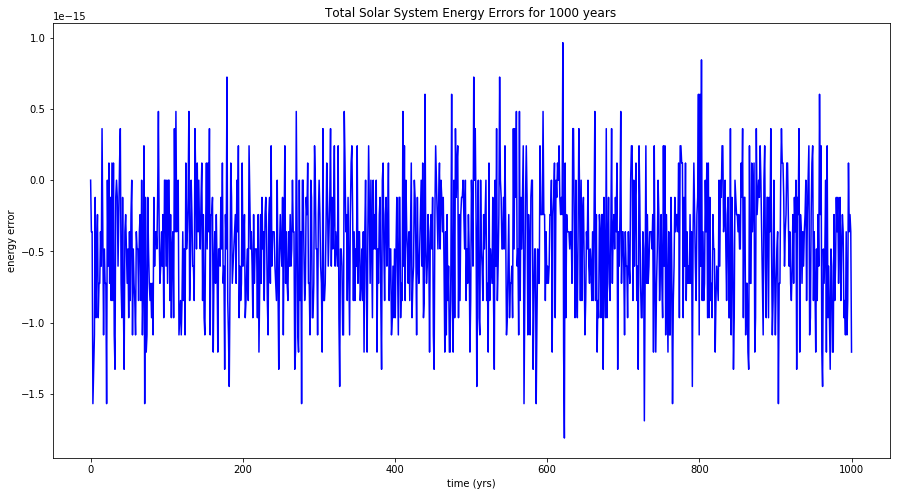

In [63]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("time (yrs)")
ax.set_ylabel("energy error")
ax.set_title("Total Solar System Energy Errors for " + str(yrs) + " years")
plt.plot(time_values, e_changes/energy_i, color='blue')

In [3]:
sim = rebound.Simulation()

# EXTRA TEST USING SI UNITS INSTEAD OF REBOUND DEFAULTS
# set to SI Units for initial condition specification
#sim.units = ('m', 's', 'kg')
#sim.add(m=1.99e30) # Sun
#sim.add(m=1, x=1.0e12, vy=11522.)
#sim.convert_particle_units('AU', 'yr', 'Msun') # convert to REBOUND's default units


# First system validation: Single Satellite around the Sun
sim.add(m=1.)
sim.add(m=5.03e-31, a=1.) # particle of mass 1 kg

sim.save("validation1.bin")
sim.status()

---------------------------------
REBOUND version:     	3.12.1
REBOUND built on:    	Feb 13 2020 23:13:03
Number of particles: 	2
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.Particle object, m=5.03e-31 x=1.0 y=0.0 z=0.0 vx=0.0 vy=1.0 vz=0.0>
---------------------------------


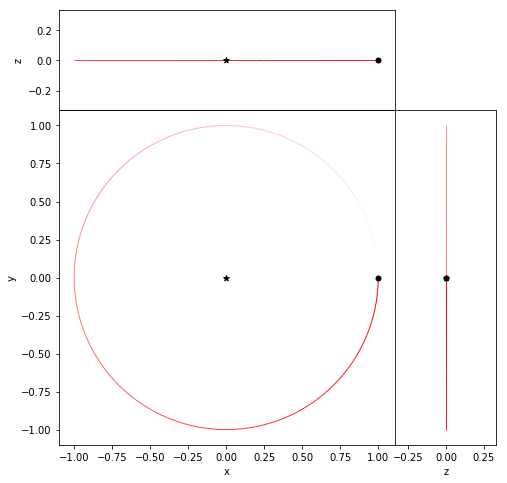

In [4]:
rebound.OrbitPlot(sim, slices=0.3,color=True);

In [21]:
sim = rebound.Simulation("validation1.bin")
sim.move_to_com()
energy_i = sim.calculate_energy()
x_i = sim.particles[1].x
y_i = sim.particles[1].y
sim.integrate(100.*2*np.pi)
energy_f = sim.calculate_energy()
x_f = sim.particles[1].x
y_f = sim.particles[1].y
print(x_i,y_i,energy_i)
print(x_f,y_f,energy_f)

1.0 0.0 -2.515e-31
0.9999999999999988 6.06965866456477e-13 -2.5149999999999998e-31


In [23]:
#ERROR on Analytic Test 1
x_error = abs(x_i-x_f)/sim.particles[1].a
y_error = abs(y_i-y_f)/sim.particles[1].a
energy_error = (energy_i - energy_f)/energy_i
print(x_error,y_error,energy_error)

1.2212453270876722e-15 6.06965866456477e-13 1.7411760242604584e-16


In [5]:
sim = rebound.Simulation("validation1.bin")
times = 365 * 5 # 5 calculations per day // NB: At 365 the errors are small, at 365*5 they become miniscule
xdata = []
ydata = []

print("INITIAL STATUS:")
sim.status()

for t in range(times):
    sim.dt = sim.particles[1].P/(365.*5.) # timeStep adjusted to 1/5th of a day
    sim.step()
#    print("t = " + str(t) + ", x = " + str(sim.particles[1].x) + ", y = " + str(sim.particles[1].y))
    xdata.append(sim.particles[1].x)
    ydata.append(sim.particles[1].y)

print("FINAL STATUS:")
sim.status()

x_err_val = abs((1 - sim.particles[1].x) / sim.particles[1].a)
y_err_val = abs((0 - sim.particles[1].y) / sim.particles[1].a)

print("Error as percentage of radius: " + str(x_err_val) + "% off for x, and " + str(y_err_val) + "% off for y.")

if (1 - sim.particles[1].x) < 0.001 and (0 - sim.particles[1].y) < 0.001:
    print("Values within acceptable threshold -- VALID")
else:
    print("Error: Values outside acceptable limits -- INVALID")

INITIAL STATUS:
---------------------------------
REBOUND version:     	3.12.1
REBOUND built on:    	Feb 13 2020 23:13:03
Number of particles: 	2
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.Particle object, m=5.03e-31 x=1.0 y=0.0 z=0.0 vx=0.0 vy=1.0 vz=0.0>
---------------------------------
FINAL STATUS:
---------------------------------
REBOUND version:     	3.12.1
REBOUND built on:    	Feb 13 2020 23:13:03
Number of particles: 	2
Selected integrator: 	ias15
Simulation time:     	6.2831853071796493e+00
Current timestep:    	0.013771
---------------------------------
<rebound.Particle object, m=1.0 x=1.2130743551459944e-46 y=3.160442209511332e-30 z=0.0 vx=-4.7553829721960345e-47 vy=1.9778458854682248e-49 vz=0.0>
<rebound.Particle object, m=5.03e-31 x=1.0 y=-1.9992688060632702e-16 z=0.0 vx=1.8171228410857054e-16 vy

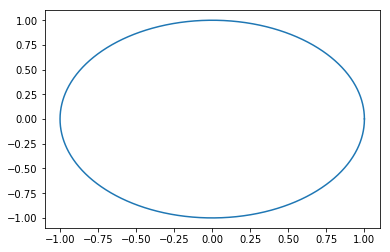

In [6]:
plt.plot(xdata,ydata)

In [7]:
"""SECOND VALIDATION SYSTEM"""

'SECOND VALIDATION SYSTEM'

In [20]:
# Second validation system: 2 bodies orbiting center of mass -- body 1 is half the size and half the radius of body 2
sim2 = rebound.Simulation()
sim2.move_to_com()
sim2.add(m=0.5,x=0.25, vy=0.5)
sim2.add(m=0.25,x=-0.5, vy=-0.5) # negative to appropriately set up problem


sim2.save("validation2.bin")
sim2.status()

---------------------------------
REBOUND version:     	3.12.1
REBOUND built on:    	Feb 13 2020 23:13:03
Number of particles: 	2
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=0.5 x=0.25 y=0.0 z=0.0 vx=0.0 vy=0.5 vz=0.0>
<rebound.Particle object, m=0.25 x=-0.5 y=0.0 z=0.0 vx=0.0 vy=-0.5 vz=0.0>
---------------------------------


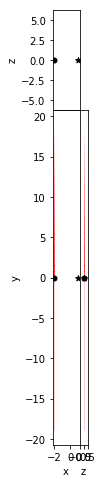

In [4]:
rebound.OrbitPlot(sim2, slices=0.3,color=True);

-2.0 0.0 27936.708333333332
-1.8191383565249921 -242530.77201235475 27936.708333333332


In [27]:
sim2 = rebound.Simulation("validation2.bin")
sim2.move_to_com()
times = 100 * 365 * 5 # 5 calculations per day // NB: At 365 the errors are small, at 365*5 they become miniscule
xdata1 = []
ydata1 = []
xdata2 = []
ydata2 = []

#print("INITIAL STATUS:")
#sim2.status()
energy_initial = sim2.calculate_energy()
x1i = sim2.particles[0].x
y1i = sim2.particles[0].y
x2i = sim2.particles[1].x
y2i = sim2.particles[1].y
for t in range(times):
    sim2.dt = sim2.particles[1].P/(365.*5.) # timeStep adjusted to 1/5th of a day
    sim2.step()
#    print("t = " + str(t) + ", x = " + str(sim2.particles[1].x) + ", y = " + str(sim2.particles[1].y))
    xdata1.append(sim2.particles[0].x)
    ydata1.append(sim2.particles[0].y)
    xdata2.append(sim2.particles[1].x)
    ydata2.append(sim2.particles[1].y)

energy_final = sim2.calculate_energy()

print(str(abs(energy_initial-energy_final)/energy_initial) + "% error for energy")
print(str(abs(xdata1[-1]-x1i)/x1i) + "% error on x1")
print(str(abs(ydata1[-1]-y1i)/x1i) + "% error on y1")
print(str(abs(xdata2[-1]-x2i)/x2i) + "% error on x2")
print(str(abs(ydata2[-1]-y2i)/x2i) + "% error on y2")
print(ydata1[-1],ydata2[-1])


#print("FINAL STATUS:")
#sim2.status()

#x_err_val = abs((1 - sim2.particles[1].x) / sim2.particles[1].a)
#y_err_val = abs((0 - sim2.particles[1].y) / sim2.particles[1].a)

#print("Error as percentage of radius: " + str(x_err_val) + "% off for x, and " + str(y_err_val) + "% off for y.")

#if (1 - sim2.particles[1].x) < 0.001 and (0 - sim2.particles[1].y) < 0.001:
#    print("Values within acceptable threshold -- VALID")
#else:
#    print("Error: Values outside acceptable limits -- INVALID")

-3.3306690738754706e-16% error for energy
1.1102230246251565e-16% error on x1
8.517925947915117e-14% error on y1
-1.1102230246251565e-16% error on x2
-1.896967825876228e-13% error on y2
-2.1294814869787793e-14 9.48483912938114e-14


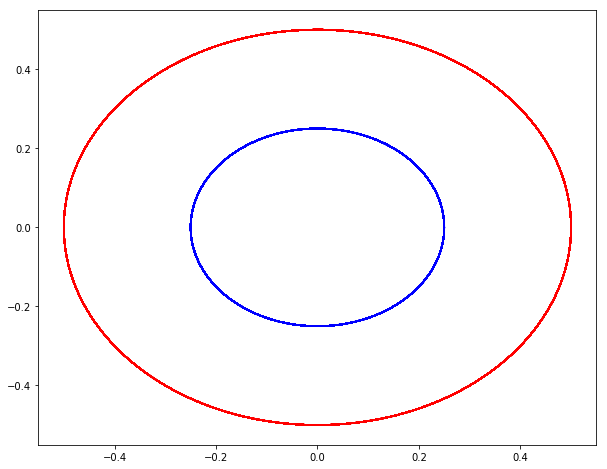

In [22]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.plot(xdata1, ydata1, color='blue')
ax.plot(xdata2, ydata2, color='red')